In [1]:
from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

import matplotlib.pyplot as plt

# This is the path where you stored your copy of the nuScenes dataset.
DATAROOT = 'Dataset/'

history_length = 2
prediction_length = 6

# Use v1.0-trainval or v1.0-mini
nusc = NuScenes('v1.0-trainval', dataroot=DATAROOT, verbose=False)
helper = PredictHelper(nusc)

In [41]:
# 0 - human.pedestrian.adult
# 1 - human.pedestrian.child
# 8 - vehicle.car
# 9 - vehicle.motorcycle
# 10 - vehicle.bicycle

target_category = nusc.category[0]
target_category_token = target_category['token']

target_category

{'token': '1fa93b757fc74fb197cdd60001ad8abf',
 'name': 'human.pedestrian.adult',
 'description': 'Adult subcategory.'}

In [42]:
all_instances = nusc.instance
len(all_instances)

64386

In [43]:
# In seconds from both sides
min_nbrs_annotations = prediction_length * 2 + history_length * 2
min_nbrs_annotations

16

In [44]:
# Only selected category
sorted_instances = []

for instance in all_instances:
    if instance['category_token'] != target_category_token:
        continue
    
    sorted_instances.append(instance)

In [45]:
len(sorted_instances)

10690

### Создание списка вида InstanceToken_SampleToken

In [67]:
# The minimum difference (amount annotations) between two train samples of the same instance
time_split_between_samples = 0.5 # In seconds
min_covered_distance = 2

In [68]:
from scipy.spatial import distance

def GetTrainSamplesFromInstance(instance_token, all_annotations):
    # Split between train samples
    split = int(time_split_between_samples * 2) # Convert to amount of annotations (1 sec = 2 annotations)
    
    all_samples = []
    
    print(f"Start: {history_length * 2}; Total len {len(all_annotations)} step: {split}")
    for i in range(history_length * 2, len(all_annotations), split):        
        sample_token = all_annotations[i]['sample_token']
        
        past = helper.get_past_for_agent(instance_token, sample_token, history_length, in_agent_frame=True)        
        future = helper.get_future_for_agent(instance_token, sample_token, prediction_length, in_agent_frame=True)
        
        # Remove samples which not pass at least N meters
        startPos = past[0]
        finishPos = future[len(future) - 1]
        dst = distance.euclidean(startPos, finishPos)
        
        if len(past) != 4 or len(future) != 12 or dst < min_covered_distance:
            print("Fail")
        else:
            all_samples.append(f"{instance_token}_{sample_token}")
    
    return all_samples

In [69]:
train_list = []

for instance in sorted_instances:
#for i in range(1):
    #instance = sorted_instances[330]
    # Get first agent's sample token
    target_instance_token = instance['token']
    first_appearance_sample_token = nusc.get('sample_annotation', instance['first_annotation_token'])['sample_token']

    # Check if exist enough annotations
    all_annotations = helper.get_future_for_agent(target_instance_token,
                                                  first_appearance_sample_token,
                                                  seconds=9999,
                                                  in_agent_frame=False,
                                                  just_xy=False)
    
    # To get best data - remove first and last seconds of this instance
    # Remove first element from list    
    all_annotations = all_annotations[1:]
    
    # Remove last 1 elements from list
    all_annotations = all_annotations[: len(all_annotations) - 1]
    
    
    amount_of_annotations = len(all_annotations)
    
    # If not enough amount of annotations => continue
    print(f"{amount_of_annotations}")
    if amount_of_annotations <= min_nbrs_annotations:
        continue
        
    samples = GetTrainSamplesFromInstance(target_instance_token, all_annotations)
    
    for sample in samples:
        train_list.append(sample)

11
21
Start: 4; Total len 21 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
5
10
11
14
2
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
1
5
35
Start: 4; Total len 35 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
35
Start: 4; Total len 35 step: 1
Fail


Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
9
30
Start: 4; Total len 30 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
14
31
Start: 4; Total len 31 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
12
27
Start: 4; Total len 27 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
24
Start: 4; Total len 24 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
4
23
Start: 4; Total len 23 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
31
Start: 4; Total len 31 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
22
Start: 4; Total len 22 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
6
21
Start: 4; Total l

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
28
Start: 4; Total len 28 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
23
Start: 4; Total len 23 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
16
34
Start: 4; Total len 34 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
4
13
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
34
Start: 4; Total len 34 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fa

Fail
Fail
Fail
Fail
33
Start: 4; Total len 33 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
10
35
Start: 4; Total len 35 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
35
Start: 4; Total len 35 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
25
Start: 4; Total len 25 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
29
Start: 4; Total len 29 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
29
Start: 4; Total len 29 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
5
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
9
9
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
F

Fail
Fail
Fail
Fail
5
3
9
16
0
3
10
15
7
5
18
Start: 4; Total len 18 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
18
Start: 4; Total len 18 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
9
10
6
7
15
8
8
7
0
1
10
4
6
5
12
11
14
10
0
0
14
0
19
Start: 4; Total len 19 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
7
13
5
7
10
16
1
11
0
7
19
Start: 4; Total len 19 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
18
Start: 4; Total len 18 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
17
Start: 4; Total len 17 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
8
18
Start: 4; Total len 18 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
17
Start: 4; Total len 17 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
5
6
8
7
10
16
0
8
1
8
1

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
31
Start: 4; Total len 31 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
30
Start: 4; Total len 30 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
34
Start: 4; Total len 34 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
6
15
25
Start: 4; Total len 25 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
23
Start: 4; Total len 23 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
29
Start: 4; Total len 29 step: 1

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
7
12
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
23
Start: 4; Total len 23 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
31
Start: 4; Total len 31 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
1
6
19
Start: 4; Total len 19 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
3
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
31
Start: 4; Total len 31 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
10
17
Start: 4; Total len 17 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
22
Start: 4; Total len 22 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
3
2
14
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fai

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
0
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
31
Start: 4; Total len 31 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
0
26
Start: 4; Total len 26 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
11
24
Start: 4; Total len 24 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
0
7
1
9
12
2
12
7
4
10
14
2
8
17
Start: 4; Total len 17 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
18
Start: 4; Total len 18 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
21
Start: 4; Total len 21 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
28
Start: 4; Total len 28 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
19
Start: 4; Total le

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
18
Start: 4; Total len 18 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
17
Start: 4; Total len 17 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
6
9
26
Start: 4; Total len 26 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
4
5
0
32
Start: 4; Total len 32 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
0
25
Start: 4; Total len 25 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
11
19
Start: 4; Total len 19 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
37
Start: 4; Total len 37 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
0
4
7
21
Start: 4; Total len 21 step: 1
Fail
Fail
Fail
Fai

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
36
Start: 4; Total len 36 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
33
Start: 4; Total len 33 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
20
Start: 4; Total len 20 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
27
Start: 4; Total len 27 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
22
Start: 4; Total len 22 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
32
Start: 4; Total len 32 step: 1
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
27
Start: 4; Total le

IndexError: index 0 is out of bounds for axis 0 with size 0

In [70]:
len(train_list)

5686

In [71]:
import random
random.shuffle(train_list)

### Export списка

In [72]:
import json

file_name = './CustomDataSplit/peds.json'

with open(file_name, 'w', encoding='utf-8') as f:
    json.dump(train_list, f, ensure_ascii=False, indent=4)

### Объединение мото+вело

In [82]:
with open("./CustomDataSplit/moto.json", "r") as read_file:
    moto = json.load(read_file)
    
with open("./CustomDataSplit/bikes.json", "r") as read_file:
    bikes = json.load(read_file)

In [ ]:
motobikes = []

motobikes.extend(moto)
motobikes.extend(bikes)

In [83]:
file_name = './CustomDataSplit/motobikes.json'

with open(file_name, 'w', encoding='utf-8') as f:
    json.dump(motobikes, f, ensure_ascii=False, indent=4)

NameError: name 'motobikes' is not defined

# Лучше использовать NpyDataCreator
### Создание train/val/test сплита (5k + 2k + 2k)

In [2]:
train = get_prediction_challenge_split("train", dataroot=DATAROOT)
validation = get_prediction_challenge_split("train_val", dataroot=DATAROOT)
test = get_prediction_challenge_split("val", dataroot=DATAROOT)

car_train = train[:20000]
car_validation = validation[:5000]
car_test = test[:5000]

In [4]:
import json

with open("./CustomDataSplit/peds.json", "r") as read_file:
    peds = json.load(read_file)
    
with open("./CustomDataSplit/motobikes.json", "r") as read_file:
    motobikes = json.load(read_file)

In [5]:
peds_train = peds[:3600]
peds_validation = peds[3600:4600]
peds_test = peds[4600:5600]

In [6]:
motobikes_train = motobikes[:650]
motobikes_validation = motobikes[650:850]
motobikes_test = motobikes[850:1050]

In [7]:
print(f"Cars: {len(car_train)} {len(car_validation)} {len(car_test)}")
print(f"Peds: {len(peds_train)} {len(peds_validation)} {len(peds_test)}")
print(f"Motobikes: {len(motobikes_train)} {len(motobikes_validation)} {len(motobikes_test)}")

Cars: 20000 5000 5000
Peds: 3600 1000 1000
Motobikes: 650 200 200


In [8]:
train = car_train
validation = car_validation
test = car_test

train.extend(peds_train)
train.extend(motobikes_train)

validation.extend(peds_validation)
validation.extend(motobikes_validation)

test.extend(peds_test)
test.extend(motobikes_test)

In [9]:
print(f"Split: {len(train)} {len(validation)} {len(test)}")

Split: 24250 6200 6200


In [10]:
file_name_train = './CustomDataSplit/train.json'

with open(file_name_train, 'w', encoding='utf-8') as f:
    json.dump(train, f, ensure_ascii=False, indent=4)
    
file_name_validation = './CustomDataSplit/validation.json'

with open(file_name_validation, 'w', encoding='utf-8') as f:
    json.dump(validation, f, ensure_ascii=False, indent=4)
    
file_name_test = './CustomDataSplit/test.json'

with open(file_name_test, 'w', encoding='utf-8') as f:
    json.dump(test, f, ensure_ascii=False, indent=4)

### Пример для double check

In [13]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.prediction.input_representation.agents import AgentBoxesWithFadedHistory
from nuscenes.prediction.input_representation.interface import InputRepresentation
from nuscenes.prediction.input_representation.combinators import Rasterizer

static_layer_rasterizer = StaticLayerRasterizer(helper)
agent_rasterizer = AgentBoxesWithFadedHistory(helper, seconds_of_history=1)
mtp_input_representation = InputRepresentation(static_layer_rasterizer, agent_rasterizer, Rasterizer())


def PlotInputRepresentation(instance_token_img, sample_token_img):
    velocity = helper.get_velocity_for_agent(instance_token_img, sample_token_img)
    acceleration = helper.get_acceleration_for_agent(instance_token_img, sample_token_img)
    heading = helper.get_heading_change_rate_for_agent(instance_token_img, sample_token_img)

    img = mtp_input_representation.make_input_representation(instance_token_img, sample_token_img)
    plt.imshow(img)

In [77]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
from IPython.display import Image
import IPython.display
import imageio
import os

GIF_PATH = './gifs/IR.gif'

def PlotInputRepresentationMap(start_annotate_token, finish_annotate_token):
  current_token = start_annotate_token
  i = 1

  images_to_gif = []

  while current_token != finish_annotate_token:
      current_ann = nusc.get('sample_annotation', current_token)
      img = mtp_input_representation.make_input_representation(current_ann['instance_token'], current_ann['sample_token'])
      
      images_to_gif.append(img)
      
      next_token = current_ann['next']
      current_token = next_token
      i += 1

  imageio.mimsave(DATAROOT + GIF_PATH, images_to_gif)
  print(f"Number of annotations: {i}")
    
  with open(DATAROOT + GIF_PATH,'rb') as f:
      display(Image(data=f.read(), format='png', width=250, height=250))

In [78]:
instance_token, sample_token = train_list[502].split("_")

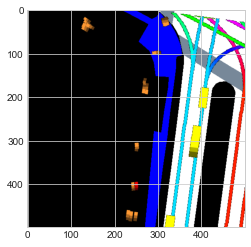

In [79]:
PlotInputRepresentation(instance_token, sample_token)

In [80]:
# Get start history snapshot's annotation
all_annotations = helper.get_past_for_agent(instance_token, sample_token, seconds=history_length, in_agent_frame=False, just_xy=False)
last_annotation = all_annotations[len(all_annotations) - 1]

start_history_annotation_token = last_annotation['token']

# Get last prediction snapshot's annotation
all_annotations = helper.get_future_for_agent(instance_token, sample_token, seconds=prediction_length, in_agent_frame=False, just_xy=False)
last_annotation = all_annotations[len(all_annotations) - 1]

finish_prediction_annotation_token = last_annotation['token']

Number of annotations: 17


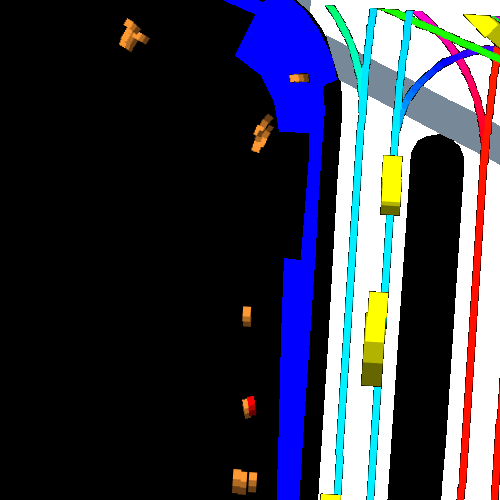

In [81]:
PlotInputRepresentationMap(start_history_annotation_token, finish_prediction_annotation_token)

Number of annotations: 17


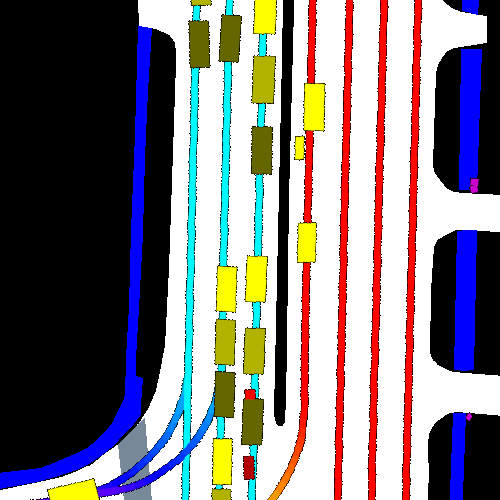

In [28]:
PlotInputRepresentationMap(start_history_annotation_token, finish_prediction_annotation_token)

### Попытка ещё по дистанции отсортировать

In [137]:
# def GetEgoPosBySampleToken(sample_token):
#     sample = nusc.get('sample', start_prediction_sample_token)

#     # Get ego pos in exact sample
#     cam_front_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT'])
#     needed_ego_pos_token = cam_front_data['ego_pose_token']

#     # Get ego_pos object by token
#     all_ego_poses = nusc.ego_pose
    
#     for ego_pos in all_ego_poses:
#         token = ego_pos['token']

#         # Return translation in world frame
#         if token == needed_token:
#             return ego_pos['translation']    

In [138]:
# # Find agent index with maximum average distance from ego_vehicle

# def GetAverageDistanceFromEgoVehicle(start_annotate_token, finish_annotate_token):
#     all_frames_distance = []
#     current_token = start_annotate_token
    
#     while current_token != finish_annotate_token:
#         current_ann = nusc.get('sample_annotation', current_token)
        
#         sample_token = current_ann['sample_token']
        
#         ego_pos = np.array(GetEgoPosBySampleToken(sample_token))
#         agent_pos = np.array(current_ann['translation'])
        
#         dist = np.linalg.norm(ego_pos-agent_pos)
#         #print(f"Dst: {dist}; Ego: {ego_pos}; Ag: {current_ann['translation']}; {agent_pos}")
#         all_frames_distance.append(dist)
        
#         current_token = current_ann['next']
        
#     #print(f"avg: {np.average(all_frames_distance)}")
#     return np.average(all_frames_distance)
        

# all_instances_av_distance = []

# for instance in sorted_instances:
#     #instance = sorted_instances[84]

#     # Get first agent's sample token
#     target_instance_token = instance['token']
#     first_prediction_sample_token = nusc.get('sample_annotation', instance['first_annotation_token'])['sample_token']

#     # Add starting offset
#     all_annotations = helper.get_future_for_agent(target_instance_token, first_prediction_sample_token, seconds=0.5 * nbrs_annotations_offset, in_agent_frame=False, just_xy=False)
#     last_annotation = all_annotations[len(all_annotations) - 1]
#     first_prediction_sample_token = last_annotation['sample_token']
    
#     # Get start prediction token
#     all_annotations = helper.get_future_for_agent(target_instance_token, first_prediction_sample_token, seconds=history_length, in_agent_frame=False, just_xy=False)
#     last_annotation = all_annotations[len(all_annotations) - 1]

#     start_prediction_annotation_token = last_annotation['token']
#     start_prediction_sample_token = last_annotation['sample_token']

#     # Get finish prediction token
#     all_annotations = helper.get_future_for_agent(target_instance_token, start_prediction_sample_token, seconds=prediction_length, in_agent_frame=False, just_xy=False)
#     last_annotation = all_annotations[len(all_annotations) - 1]

#     finish_prediction_annotation_token = last_annotation['token']

#     average_distance = GetAverageDistanceFromEgoVehicle(start_prediction_annotation_token, finish_prediction_annotation_token)
#     all_instances_av_distance.append(average_distance)

# index = all_instances_av_distance.index(max(all_instances_av_distance))
# print(f"Index: {index}; Val: {all_instances_av_distance[index]}")